In [41]:
import numpy as np
import matplotlib.pyplot as plt

import scipy

import copy

## Upsampling

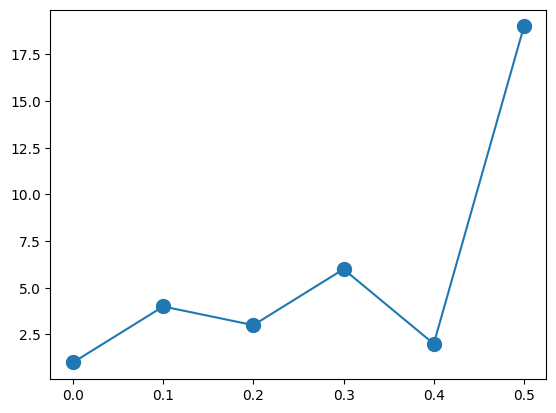

In [11]:
srate = 10

data  = np.array( [1, 4, 3, 6, 2, 19] )

npnts = len(data)
time = np.arange(0,npnts) /srate

plt.plot(time,data,"o-",markersize=10)
plt.show()

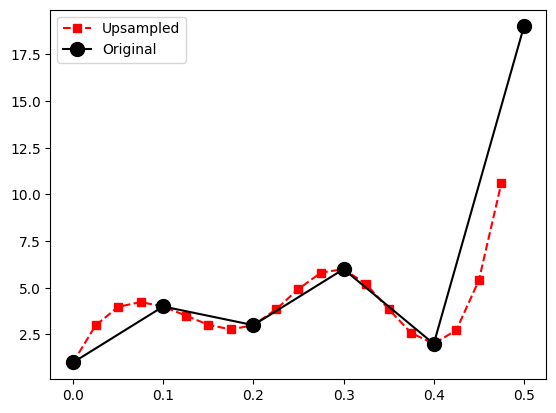

In [19]:
upsampleFactor = 4
newNpnts = npnts*upsampleFactor

newTime = np.arange(0,newNpnts)/(upsampleFactor*srate)

newTime = newTime[newTime<time[-1]]

newSrateActual = 1/np.mean(np.diff(newTime))

updataI = scipy.interpolate.griddata(time, data, newTime, method='cubic')

plt.plot(newTime,updataI,'rs--',label='Upsampled')
plt.plot(time,data,"ko-",label='Original',markersize=10)
plt.legend()
plt.show()

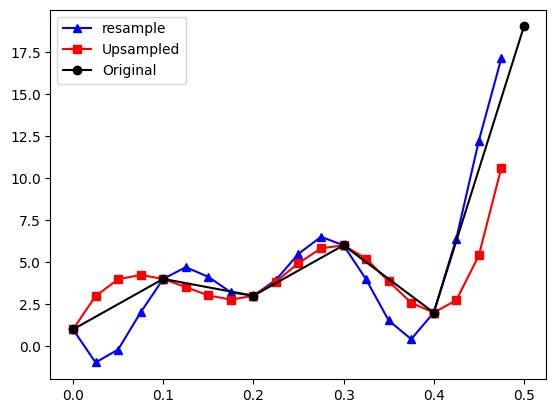

In [21]:
newSrate = 40

newNpnts = int( len(data)*newSrate/srate )
updataR = scipy.signal.resample(data,newNpnts)

newTimeR = np.arange(0,newNpnts)/newSrate

updataR  = updataR[newTimeR<time[-1]]
newTimeR = newTimeR[newTimeR<time[-1]]


plt.plot(newTimeR,updataR,'b^-',label='resample')
plt.plot(newTime,updataI,'rs-',label='Upsampled')
plt.plot(time,data,'ko-',label='Original')
plt.legend()
plt.show()

## Downsampling

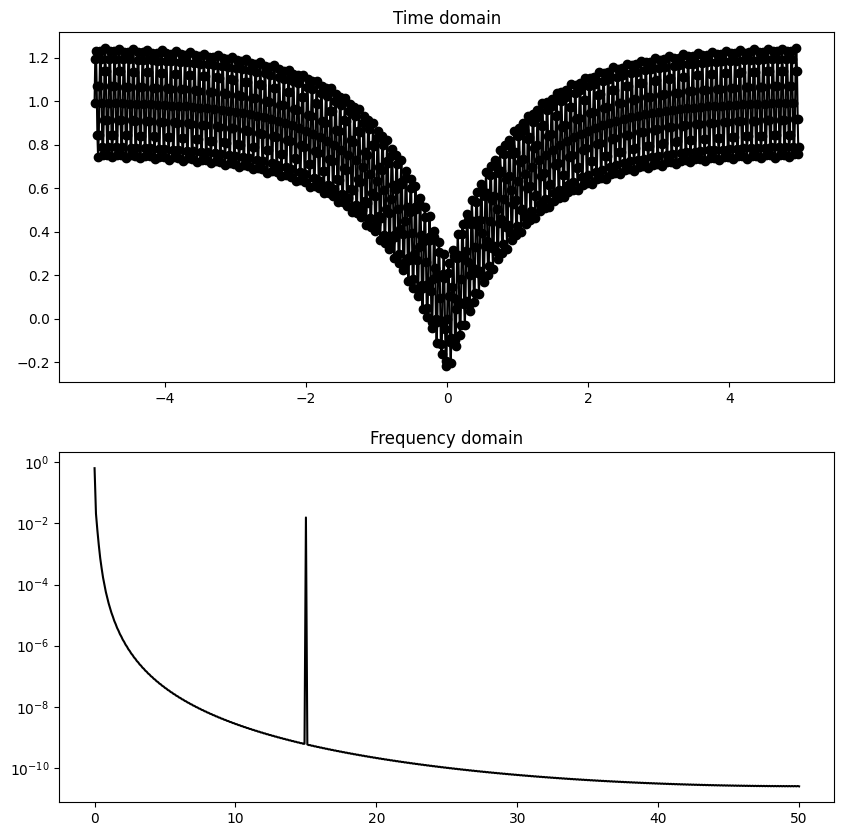

In [29]:
srate = 100
tv = np.arange(-5,5,1/srate)
npnts = len(tv)

laplace = 1 - np.exp(-np.abs(tv))
fastsine = 0.25 * np.sin(2*np.pi*tv*15)

signal = laplace + fastsine

hzO = np.linspace(0,srate/2, int(np.floor(npnts/2))+1)

signalO_pow = np.abs(scipy.fft.fft(signal)/npnts)**2
signalO_pow = signalO_pow[:len(hzO)]

plt.figure(figsize=(10,10))
plt.subplot(211)
plt.plot(tv,signal,'ko-')
plt.title('Time domain')

plt.subplot(212)
plt.plot(hzO,signalO_pow,'k-')
plt.yscale('log')
plt.title('Frequency domain')
plt.show()

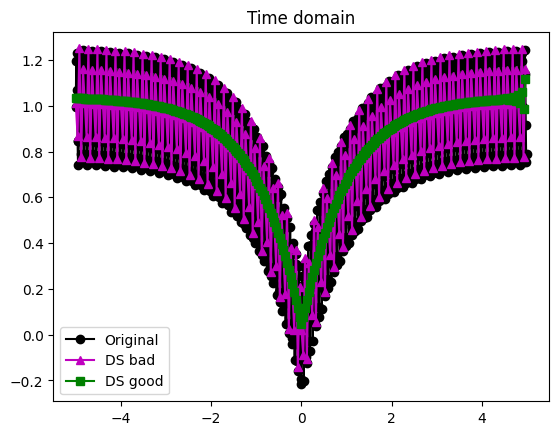

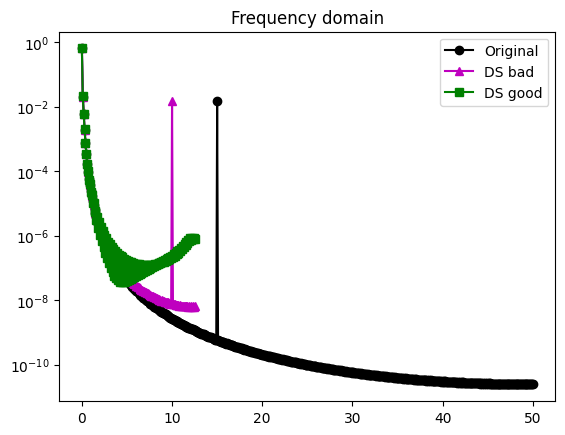

In [31]:
dnsampleFactor = 4
newSrate = srate/dnsampleFactor
newTv = np.arange(-5,5,1/newSrate)
newPnts = len(newTv)

signal_dsB = signal[:-1:dnsampleFactor]

hz_ds = np.linspace(0,newSrate/2,int(np.floor(newPnts/2)+1))
signal_dsB_pow = np.abs(scipy.fftpack.fft(signal_dsB)/newPnts)**2
signal_dsB_pow = signal_dsB_pow[:len(hz_ds)]


fkern = scipy.signal.firwin(int(14*newSrate/2),newSrate/2,fs=srate,pass_zero=True)
fsignal = scipy.signal.filtfilt(fkern,1,signal)

signal_dsG = fsignal[:-1:dnsampleFactor]

signal_dsG_pow = np.abs(scipy.fftpack.fft(signal_dsG)/newPnts)**2
signal_dsG_pow = signal_dsG_pow[:len(hz_ds)]

fsignal_pow = np.abs(scipy.fftpack.fft(fsignal)/npnts)**2
fsignal_pow = fsignal_pow[:len(hz_ds)]

plt.plot(tv,signal,'ko-',label='Original')
plt.plot(newTv,.02+signal_dsB,'m^-',label='DS bad')
plt.plot(newTv,.04+signal_dsG,'gs-',label='DS good')
plt.legend()
plt.title('Time domain')
plt.show()

plt.plot(hzO,signalO_pow,'ko-',label='Original')
plt.plot(hz_ds,signal_dsB_pow,'m^-',label='DS bad')
plt.plot(hz_ds,signal_dsG_pow,'gs-',label='DS good')
plt.legend()
plt.title('Frequency domain')
plt.yscale('log')
plt.show()

## Interpolation

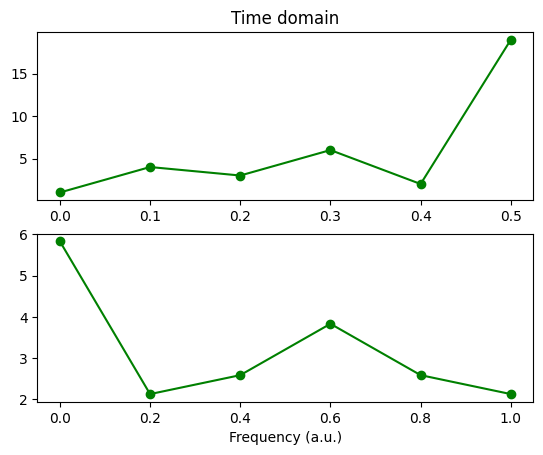

In [32]:
srate = 10

data  = np.array( [1, 4, 3, 6, 2, 19] )

npnts = len(data)
time  = np.arange(0,npnts)/srate

plt.subplot(211)
plt.plot(time,data,'go-')
plt.title('Time domain')

plt.subplot(212)
plt.plot(np.linspace(0,1,npnts),np.abs(scipy.fftpack.fft(data/np.array(npnts))),'go-')
plt.xlabel('Frequency (a.u.)')

plt.show()

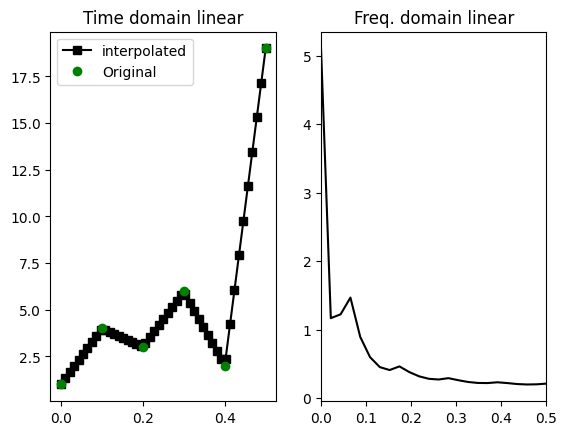

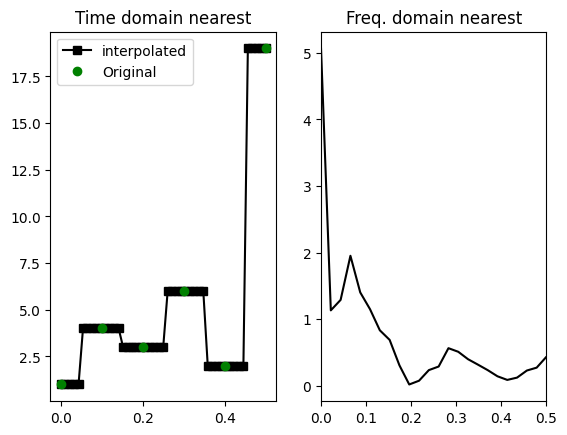

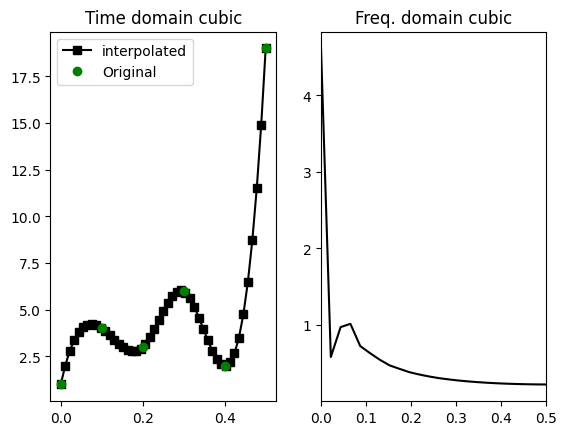

In [33]:
N = 47
newTime = np.linspace(time[0],time[-1],N)

interpOptions = ['linear','nearest','cubic']


for methodi in range(0,len(interpOptions)):
    
    newdata = scipy.interpolate.griddata(time, data, newTime, method=interpOptions[methodi])
    
    plt.subplot(121)
    plt.plot(newTime,newdata,'ks-',label='interpolated')
    plt.plot(time,data,'go',label='Original')
    plt.title('Time domain '+interpOptions[methodi])
    plt.legend()
    
    plt.subplot(122)
    plt.plot(np.linspace(0,1,N),np.abs(scipy.fftpack.fft(newdata/N)),'k')
    plt.xlim([0,.5])
    plt.title('Freq. domain '+interpOptions[methodi])
    plt.show()
    

## Resample irregularly sampled data

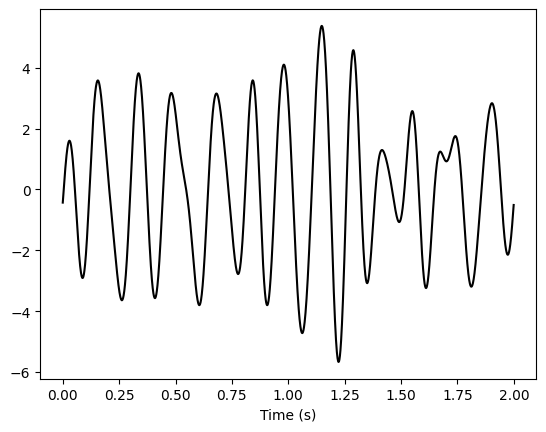

In [34]:
srate    = 1324 
peakfreq =    7  
fwhm     =    5    
npnts    = srate*2 
timevec  = np.arange(0,npnts)/srate 

hz = np.linspace(0,srate,npnts)
s  = fwhm*(2*np.pi-1)/(4*np.pi) 
x  = hz-peakfreq                
fg = np.exp(-.5*(x/s)**2)     

fc = np.random.rand(npnts) * np.exp(1j*2*np.pi*np.random.rand(npnts))

fc = fc * fg

signal1 = 2*np.real( scipy.fftpack.ifft(fc) )*npnts

plt.plot(timevec,signal1,'k')
plt.xlabel('Time (s)')
plt.show()

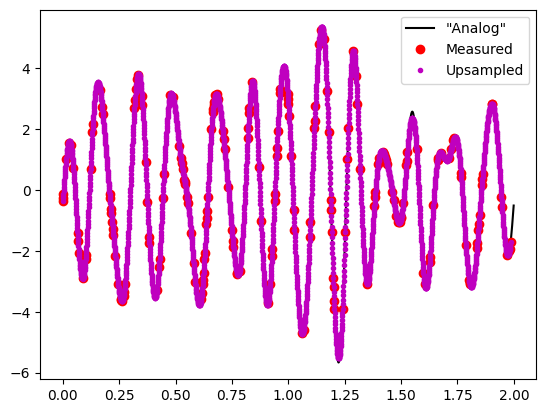

In [36]:
sampSig = []

sampintervals = np.append(1,np.cumsum(np.ceil( np.exp(4*np.random.rand(npnts)))))
sampintervals = sampintervals[sampintervals<np.array(npnts)]  

for i in range(0,len(sampintervals)):

    nextdat = signal1[ int(sampintervals[i]) ] , timevec[ int(sampintervals[i]) ]
    
    sampSig.append(nextdat)

sampSig = np.array(sampSig)

newsignal = scipy.interpolate.griddata(sampSig[:,1], sampSig[:,0], timevec, method='cubic')

plt.plot(timevec,signal1,'k',label='"Analog"')
plt.plot(sampSig[:,1],sampSig[:,0],'ro',label='Measured')
plt.plot(timevec,newsignal,'m.',label='Upsampled')
plt.legend()
plt.show()

## Extrapolation

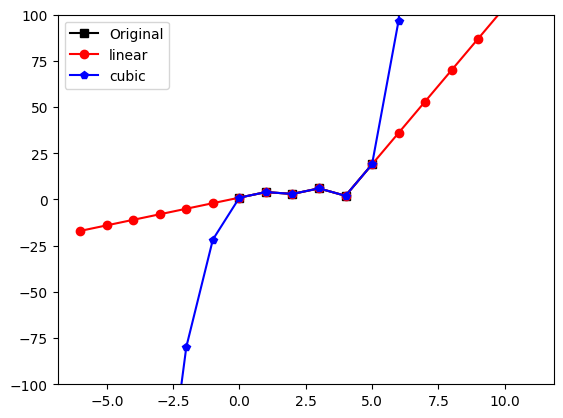

In [40]:
signal1 = np.array( [1, 4, 3, 6, 2, 19] )
timevec = np.arange(0,len(signal1))

times2extrap = np.arange(-len(signal1),2*len(signal1))

Flin = scipy.interpolate.interp1d(timevec,signal1,kind='linear',fill_value='extrapolate')
Fcub = scipy.interpolate.interp1d(timevec,signal1,kind='cubic',fill_value='extrapolate')

extrapLin = Flin(times2extrap)
extrapCub = Fcub(times2extrap)

plt.plot(timevec,signal1,'ks-',label='Original')
plt.plot(times2extrap,extrapLin,'ro-',label='linear')
plt.plot(times2extrap,extrapCub,'bp-',label='cubic')
plt.legend()
plt.ylim([-100,100])
plt.show()

## Spectral interpolation

C:\Users\kerem\AppData\Local\Temp\ipykernel_9120\2401930937.py:9: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  fftPre = scipy.fftpack.fft(signal1[ range(boundaryPnts[0]-int(np.diff(boundaryPnts)),boundaryPnts[0])] )
C:\Users\kerem\AppData\Local\Temp\ipykernel_9120\2401930937.py:10: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  fftPst = scipy.fftpack.fft(signal1[ range(boundaryPnts[1]+1,boundaryPnts[1]+int(np.diff(boundaryPnts)+1))] )
C:\Users\kerem\AppData\Local\Temp\ipykernel_9120\2401930937.py:13: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single el

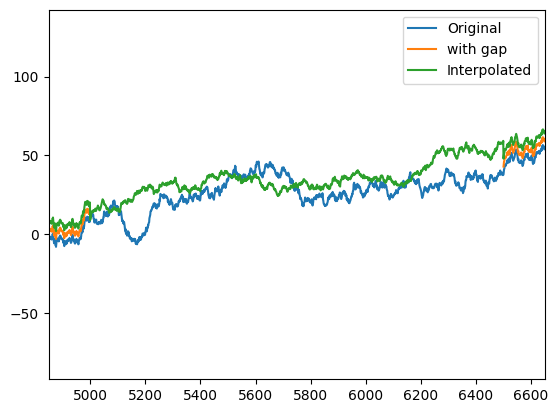

In [45]:
n = 10000

origsig = np.cumsum( np.random.randn(n) )
signal1 = copy.deepcopy(origsig)

boundaryPnts = [ 5000, 6500 ]
signal1[range(boundaryPnts[0],boundaryPnts[1])] = np.nan

fftPre = scipy.fftpack.fft(signal1[ range(boundaryPnts[0]-int(np.diff(boundaryPnts)),boundaryPnts[0])] )
fftPst = scipy.fftpack.fft(signal1[ range(boundaryPnts[1]+1,boundaryPnts[1]+int(np.diff(boundaryPnts)+1))] )

mixeddata = scipy.signal.detrend( np.real(scipy.fftpack.ifft( ( fftPre+fftPst )/2 )))
linedata  = np.linspace(0,1,int(np.diff(boundaryPnts))) * (signal1[boundaryPnts[1]+1]-signal1[boundaryPnts[0]-1]) + signal1[boundaryPnts[0]-1]

linterp = mixeddata + linedata

filtsig = copy.deepcopy( signal1 )
filtsig[ range(boundaryPnts[0],boundaryPnts[1]) ] = linterp

plt.plot(np.arange(0,n),origsig,label='Original')
plt.plot(np.arange(0,n),signal1+5,label='with gap')
plt.plot(np.arange(0,n),filtsig+10,label='Interpolated')
plt.legend()

plt.xlim([boundaryPnts[0]-150, boundaryPnts[1]+150])

plt.show()